In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from catboost import CatBoostClassifier
import pandas as pd
import pickle
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn import linear_model,metrics
from sklearn.model_selection import KFold
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import joblib 
import warnings
warnings.filterwarnings('ignore')

### Parámetros

In [2]:
underSample=False ## Mejores resultados unicamente con OverSampler
estrategia='RandomOverSampler' #SMOTE o RandomOverSampler

### Se cargan los datos

In [3]:
pd.options.display.max_columns=1000

In [4]:
f = open('filePickleEstruct.pkl','rb')
df = pickle.load(f)
f.close
df.head()

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,V12,V13,V19,V20,V29,V30,V53,V54,V56,V60,V61,V62,V64,V69,V70,V282,V283,V290,V291,V292,V302,V303,V304,V310,V315,V317,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,isFraud
0,0.002137,590539.0,0.743044,0.525111,0.381679,590490.0,0.306569,590539.0,0.488636,0.836957,0.000213,0.000176,0.0,0.0,0.000444,0.0,0.0000,0.004762,0.000000,0.000627,0.0,0.000343,0.0007,0.333333,0.166667,0.142857,0.066667,0.000000,0.00000,0.200000,0.166667,0.019608,0.000000,0.166667,0.100000,0.000000,0.00000,0.000000,0.03125,0.014706,0.0,0.0,0.0,0.0000,0.00,0.0000,0.000000,0.0,0.000873,0.898295,0.174787,0.593674,0.933013,0.974532,0.0,0.704687,0.0,0.0,0.693422,0.443307,0.541680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000900,590539.0,0.100885,0.608000,0.381679,590539.0,0.014599,590539.0,0.511364,0.836957,0.000213,0.000176,0.0,0.0,0.000444,0.0,0.0000,0.000000,0.000000,0.000314,0.0,0.000343,0.0007,0.000000,0.000000,0.142857,0.066667,0.000000,0.00000,0.000000,0.000000,0.019608,0.000000,0.166667,0.100000,0.000000,0.00000,0.000000,0.03125,0.014706,0.0,0.0,0.0,0.0000,0.00,0.0000,0.000000,0.0,0.000000,0.898295,0.174787,0.593674,0.933013,0.974532,0.0,0.704687,0.0,0.0,0.693422,0.443307,0.541680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.001840,590539.0,0.210566,0.780000,0.381679,590535.0,0.481752,590538.0,0.522727,0.836957,0.000213,0.000176,0.0,0.0,0.000444,0.0,0.0000,0.004762,0.000000,0.000314,0.0,0.000343,0.0007,0.333333,0.166667,0.142857,0.066667,0.000000,0.00000,0.200000,0.166667,0.019608,0.000000,0.166667,0.100000,0.000000,0.00000,0.000000,0.03125,0.014706,0.0,0.0,0.0,0.0000,0.00,0.0000,0.000000,0.0,0.000000,0.898295,0.174787,0.593674,0.933013,0.974532,0.0,0.704687,0.0,0.0,0.693422,0.443307,0.541680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.001558,590539.0,0.984824,0.934000,0.381679,590539.0,0.124088,590538.0,0.854545,0.836957,0.000427,0.000879,0.0,0.0,0.001775,0.0,0.0000,0.004762,0.000000,0.000314,0.0,0.008568,0.0007,0.333333,0.166667,0.142857,0.066667,0.000000,0.00000,0.200000,0.166667,0.019608,0.000000,0.166667,0.100000,0.000000,0.00000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0000,0.00,0.0000,0.006422,0.0,0.010476,0.898295,0.174787,0.593674,0.933013,0.974532,0.0,0.704687,0.0,0.0,0.693422,0.443307,0.541680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.001558,590506.0,0.201023,0.828000,0.381679,590539.0,0.014599,590539.0,0.727273,0.836957,0.000213,0.000176,0.0,0.0,0.000444,0.0,0.0003,0.000000,0.000307,0.000314,0.0,0.000343,0.0007,0.186570,0.099861,0.116624,0.056523,0.077568,0.04516,0.115517,0.103330,0.021980,0.008909,0.138297,0.086756,0.020261,0.07804,0.067987,0.03125,0.014706,0.0,0.0,0.0,0.0625,0.05,0.0625,0.000000,0.0,0.000000,1.000000,0.070815,0.593674,0.933013,1.000000,144232.0,0.704687,144232.0,144232.0,0.511628,0.774081,0.078431,144232.0,144232.0,141698.0,144231.0,144232.0,144232.0,144226.0,144232.0,0


In [5]:
print('Número de transacciones no fraudulentas '+str(len(df[df['isFraud']==0])))
print('Número de transacciones fraudulentas '+str(len(df[df['isFraud']==1])))

Número de transacciones no fraudulentas 569877
Número de transacciones fraudulentas 20663


In [6]:
dataX=df.drop('isFraud',axis=1)
tarjetY=df[['isFraud']]

### Dividir en entrenamiento/validación y test

In [7]:
X_train, X_test, y_train, y_test \
= train_test_split(dataX, tarjetY, stratify=tarjetY, test_size=0.1, random_state=0)

### Funciones para obtener mejores parámetros y validar los modelos

In [9]:
def validarModeloCrossValidation(modelo, X_train, y_train, parametros):#Grid-search-cv #devolver los mejores parámetros en base a métrica AUC
         
    cv = KFold(n_splits=5)
    #ros = RandomOverSampler(sampling_strategy='minority')
    if estrategia=='SMOTE':
        ros = SMOTE(sampling_strategy='minority',random_state=4)
    elif estrategia=='RandomOverSampler':
        ros = RandomOverSampler(sampling_strategy='minority',random_state=4)
    scores = []  
    for train_fold_index, val_fold_index in cv.split(X_train, y_train):       
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train.iloc[train_fold_index]       
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train.iloc[val_fold_index]

        # Upsample sólo sobre los datos de entrenamiento
        X_train_fold_upsample, y_train_fold_upsample = ros.fit_resample(X_train_fold,
                                                                           y_train_fold)
        # Entrenar el modelo        
        model_obj = modelo(**parametros).fit(X_train_fold_upsample, y_train_fold_upsample)
        
        # Validar el modelo sobre el conjunto de datos de validación con métrica auc
        y_pred = model_obj.predict(X_val_fold) 
        false_positive_rate, true_positive_rate, thresholds  = metrics.roc_curve(y_val_fold, y_pred)
        score = auc(false_positive_rate, true_positive_rate)
        scores.append(score)
    return np.array(scores)
    
      
def obtenerMejoresParametrosDT(dataX,tarjetY,params):
    mejoresParametros = []
    for criterion in params['criterion']:
        for max_depth in params['max_depth']:
            parametros = {
                'criterion': criterion,
                'max_depth': max_depth                
            }
            parametros['auc'] = validarModeloCrossValidation(DecisionTreeClassifier, dataX, tarjetY, parametros).mean()
            print("parámetros:")
            print(parametros)
            mejoresParametros.append(parametros)

    #Mejores parametros
    return sorted(mejoresParametros, key=lambda x: x['auc'], reverse=True)[0]

def obtenerMejoresParametrosCB(dataX,tarjetY,params):
    mejoresParametros = []
    for learning_rate in params['learning_rate']:
        for depth in params['depth']:
            for l2_leaf_reg in params['l2_leaf_reg']:
                parametros = {
                    'learning_rate': learning_rate,
                    'depth': depth,
                    'l2_leaf_reg': l2_leaf_reg,
                    'logging_level':'Silent'
                }
                parametros['auc'] = validarModeloCrossValidation(CatBoostClassifier, dataX, tarjetY, parametros).mean()
                print("parámetros:")
                print(parametros)
                mejoresParametros.append(parametros)

    #Mejores parametros
    return sorted(mejoresParametros, key=lambda x: x['auc'], reverse=True)[0]


def obtenerMejoresParametrosRF(dataX,tarjetY,params):
    mejoresParametros = []
    for max_samples in params['max_samples']:
        for min_samples_leaf in params['min_samples_leaf']:
            for min_samples_split in params['min_samples_split']:
                parametros = {
                    'max_samples': max_samples,
                    'min_samples_leaf': min_samples_leaf,
                    'min_samples_split': min_samples_split                    
                }
                parametros['auc'] = validarModeloCrossValidation(RandomForestClassifier, dataX, tarjetY, parametros).mean()
                print("parámetros:")
                print(parametros)
                mejoresParametros.append(parametros)

    #Mejores parametros
    return sorted(mejoresParametros, key=lambda x: x['auc'], reverse=True)[0]


def obtenerMejoresParametrosXG(dataX,tarjetY,params):
    mejoresParametros = []
    for max_depth in params['max_depth']:
        for min_child_weight in params['min_child_weight']:
            for learning_rate in params['learning_rate']:
                parametros = {
                    'max_depth': max_depth,
                    'min_child_weight': min_child_weight,
                    'learning_rate': learning_rate                    
                }
                parametros['auc'] = validarModeloCrossValidation(XGBClassifier, dataX, tarjetY, parametros).mean()
                print("parámetros:")
                print(parametros)
                mejoresParametros.append(parametros)

    #Mejores parametros
    return sorted(mejoresParametros, key=lambda x: x['auc'], reverse=True)[0]


  
def validarModeloTest(dataX2,tarjetY2,modelo):
    metricasClas = {
      'AUC': metrics.roc_auc_score,  
      'ACC':    metrics.accuracy_score,
      'PREC':   lambda y_true, y_pred:
                metrics.precision_score(y_true, y_pred,
                  average='micro'), 
      'RECALL': lambda y_true, y_pred:
                metrics.recall_score(y_true, y_pred,
                  average='micro'),
      'F1':     lambda y_true, y_pred:
                metrics.f1_score(y_true, y_pred, average='micro')}
     
    y_pred = modelo.predict(dataX2)

    print("Matriz de confusión:\n%s" % (metrics.confusion_matrix(tarjetY2, y_pred)))
    false_positive_rate, true_positive_rate, thresholds  = metrics.roc_curve(tarjetY2, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.figure(figsize=(5,5))
    plt.title('Modelo')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    ACC = metricasClas['ACC'](tarjetY2, y_pred)
    PREC = metricasClas['PREC'](tarjetY2, y_pred)
    RECALL = metricasClas['RECALL'](tarjetY2, y_pred)
    F1 = metricasClas['F1'](tarjetY2, y_pred)

    print("%s\n AUC: %.3f ACC: %.3f  PREC: %.3f  RECALL: %.3f  F1: %.3f" %
                      ('MÉTRICAS -->',roc_auc, ACC,PREC,RECALL,F1))   

    matriz_confusion = confusion_matrix(tarjetY2, y_pred)

    skplt.metrics.plot_confusion_matrix(tarjetY2, y_pred, normalize=True, title='Matriz de confusión')
    skplt.metrics.plot_confusion_matrix(tarjetY2, y_pred, title='Matriz de confusión')

### Obtener mejores parámetros

#### DecissionTee

In [27]:
params={'criterion': ['entropy','gini'], 'max_depth': [20,50]}
mejoresParametrosDT=obtenerMejoresParametrosDT(X_train,y_train,params)
print("Mejores Parametros para DecissionTree")
print(mejoresParametrosDT)

parámetros:
{'criterion': 'entropy', 'max_depth': 20, 'auc': 0.7696950437772352}
parámetros:
{'criterion': 'entropy', 'max_depth': 50, 'auc': 0.7435302440146839}
parámetros:
{'criterion': 'gini', 'max_depth': 20, 'auc': 0.7825859096884733}
parámetros:
{'criterion': 'gini', 'max_depth': 50, 'auc': 0.7379659084129746}
Mejores Parametros para DecissionTree
{'criterion': 'gini', 'max_depth': 20, 'auc': 0.7825859096884733}


#### RandomForest

In [10]:
params={'max_samples': [None, 0.5], 'min_samples_leaf': [1, 4],'min_samples_split': [5, 10]}
mejoresParametrosRF=obtenerMejoresParametrosRF(X_train,y_train,params)
print("Mejores Parametros para RandomForest")
print(mejoresParametrosRF)

parámetros:
{'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'auc': 0.8016149275768019}
parámetros:
{'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'auc': 0.8016578623196237}
parámetros:
{'max_samples': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'auc': 0.8389358886785188}
parámetros:
{'max_samples': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'auc': 0.8389906680842885}
parámetros:
{'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'auc': 0.8179866180098505}
parámetros:
{'max_samples': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'auc': 0.8205067370252206}
parámetros:
{'max_samples': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'auc': 0.8502860617287225}
parámetros:
{'max_samples': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'auc': 0.850446523327949}
Mejores Parametros para RandomForest
{'max_samples': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'auc': 0.850446523327949}


#### CatBoost

In [33]:
paramsCB={'learning_rate': [0.01, 0.1],
        'depth': [4, 10],
        'l2_leaf_reg': [5, 15]
        }
mejoresParametrosCB=obtenerMejoresParametrosCB(X_train,y_train,paramsCB)
print("Mejores Parametros para CatBoost")
print(mejoresParametrosCB)

parámetros:
{'learning_rate': 0.01, 'depth': 4, 'l2_leaf_reg': 5, 'logging_level': 'Silent', 'auc': 0.8084993789890869}
parámetros:
{'learning_rate': 0.01, 'depth': 4, 'l2_leaf_reg': 15, 'logging_level': 'Silent', 'auc': 0.8084942001452348}
parámetros:
{'learning_rate': 0.01, 'depth': 10, 'l2_leaf_reg': 5, 'logging_level': 'Silent', 'auc': 0.8657265203297522}
parámetros:
{'learning_rate': 0.01, 'depth': 10, 'l2_leaf_reg': 15, 'logging_level': 'Silent', 'auc': 0.8637229590058226}
parámetros:
{'learning_rate': 0.1, 'depth': 4, 'l2_leaf_reg': 5, 'logging_level': 'Silent', 'auc': 0.8562846008493512}
parámetros:
{'learning_rate': 0.1, 'depth': 4, 'l2_leaf_reg': 15, 'logging_level': 'Silent', 'auc': 0.856065344303581}
parámetros:
{'learning_rate': 0.1, 'depth': 10, 'l2_leaf_reg': 5, 'logging_level': 'Silent', 'auc': 0.8818602025189145}
parámetros:
{'learning_rate': 0.1, 'depth': 10, 'l2_leaf_reg': 15, 'logging_level': 'Silent', 'auc': 0.8862231159718975}
Mejores Parametros para CatBoost
{'le

#### XGBoost

In [34]:
paramsXG={"max_depth":[5, 12],#default 1
        "min_child_weight":[1,5],#default 1
        "learning_rate":[0.01, 0.1]}#default 0.1
mejoresParametrosXG=obtenerMejoresParametrosXG(X_train,y_train,paramsXG)
print("Mejores Parametros para XGBoost")
print(mejoresParametrosXG)

parámetros:
{'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.01, 'auc': 0.7890886537887847}
parámetros:
{'max_depth': 5, 'min_child_weight': 1, 'learning_rate': 0.1, 'auc': 0.8327120774991356}
parámetros:
{'max_depth': 5, 'min_child_weight': 5, 'learning_rate': 0.01, 'auc': 0.7893783036501304}
parámetros:
{'max_depth': 5, 'min_child_weight': 5, 'learning_rate': 0.1, 'auc': 0.8323280897196144}
parámetros:
{'max_depth': 12, 'min_child_weight': 1, 'learning_rate': 0.01, 'auc': 0.8357954026174225}
parámetros:
{'max_depth': 12, 'min_child_weight': 1, 'learning_rate': 0.1, 'auc': 0.8733457175863147}
parámetros:
{'max_depth': 12, 'min_child_weight': 5, 'learning_rate': 0.01, 'auc': 0.8367329402980503}
parámetros:
{'max_depth': 12, 'min_child_weight': 5, 'learning_rate': 0.1, 'auc': 0.8755330337523315}
Mejores Parametros para XGBoost
{'max_depth': 12, 'min_child_weight': 5, 'learning_rate': 0.1, 'auc': 0.8755330337523315}


### Entrenar y validar los modelos frente al conjunto de datos de test con los parámetros obtenidos en GridSearchCV

In [12]:
if underSample==True:
    #Combinar con underSampler
    ros = RandomOverSampler(sampling_strategy=0.1,random_state=42)#Se aumenta sólo el conjunto de entrenamiento
    X_trainPre, y_trainPre = ros.fit_resample(X_train, y_train)
    under = RandomUnderSampler(sampling_strategy=0.5,random_state=42)
    X_train2, y_train2 = under.fit_resample(X_trainPre, y_trainPre)
else:
    #ros = RandomOverSampler(sampling_strategy='minority',random_state=4)#Se aumenta sólo el conjunto de entrenamiento
    if estrategia=='SMOTE':
        ros = SMOTE(sampling_strategy='minority',random_state=4)
    elif estrategia=='RandomOverSampler':
        ros = RandomOverSampler(sampling_strategy='minority',random_state=4)#Se aumenta sólo el conjunto de entrenamiento
    X_train2, y_train2 = ros.fit_resample(X_train, y_train)

#### Entrenar y validar los modelos

#### Decission Tree

In [12]:
#mejoresParametrosDT={'criterion': 'gini', 'max_depth': 20, 'auc': 0.7825859096884733,'random_state':42}

Matriz de confusión:
[[53173  3815]
 [  568  1498]]
MÉTRICAS -->
 AUC: 0.829 ACC: 0.926  PREC: 0.926  RECALL: 0.926  F1: 0.926


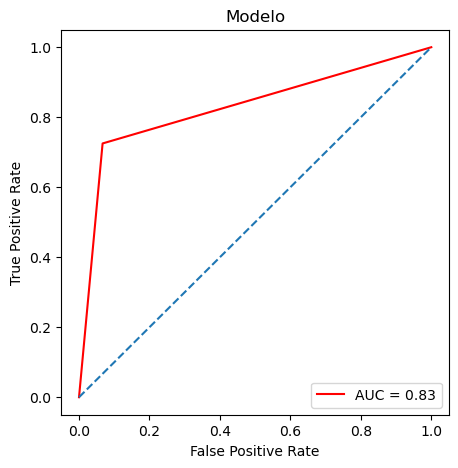

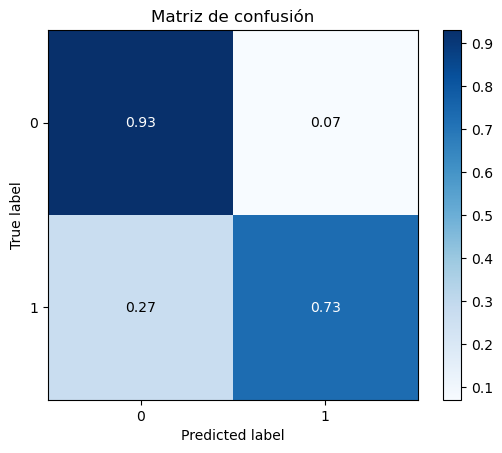

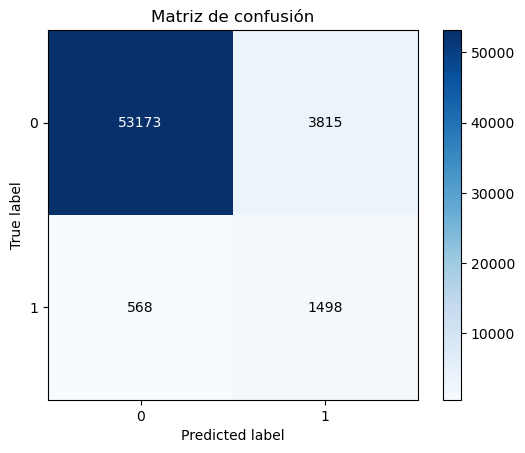

In [13]:
del mejoresParametrosDT['auc']
model=DecisionTreeClassifier(**mejoresParametrosDT)#Los mejores parámetros obtenidos
model.fit(X_train2,y_train2)
validarModeloTest(X_test,y_test,model)

#### RandomForest

In [14]:
#mejoresParametrosRF={'bootstrap': True, 'min_samples_leaf': 4, 'min_samples_split': 5, 'auc': 0.8357917559535}

Matriz de confusión:
[[56158   830]
 [  524  1542]]
MÉTRICAS -->
 AUC: 0.866 ACC: 0.977  PREC: 0.977  RECALL: 0.977  F1: 0.977


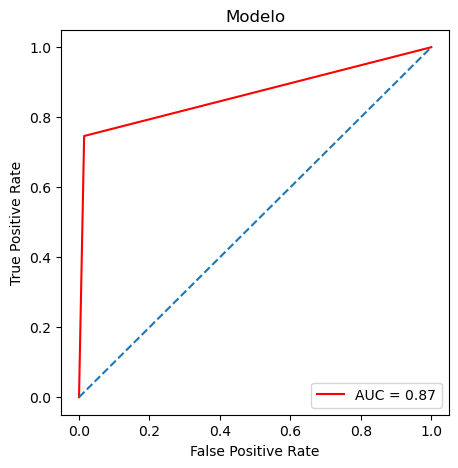

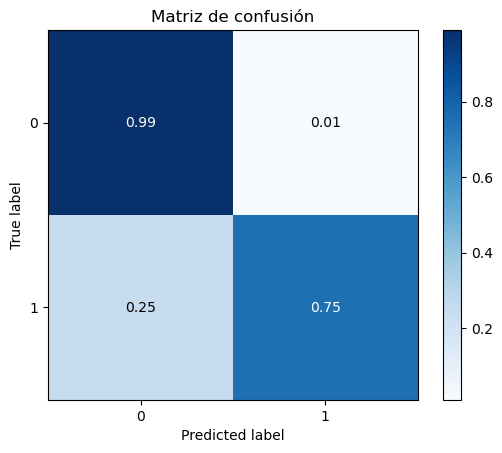

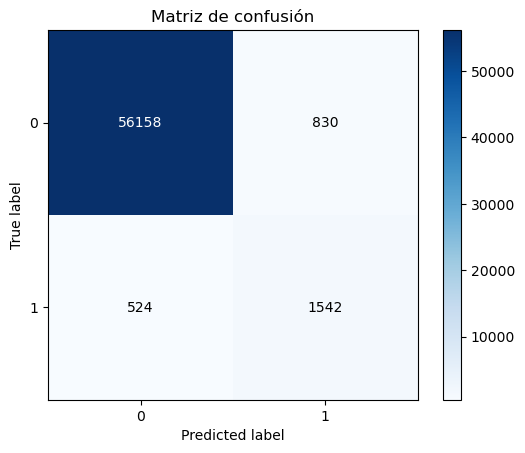

In [14]:
del mejoresParametrosRF['auc']
modelRF=RandomForestClassifier(**mejoresParametrosRF)#Los mejores parámetros obtenidos
modelRF.fit(X_train2,y_train2)
validarModeloTest(X_test,y_test,modelRF)

In [16]:
import joblib 
joblib.dump(modelRF, 'modeloRandomForest.pkl') # Guardo el modelo.

['modeloRandomForest.pkl']

#### CatBoost

In [16]:
#mejoresParametrosCB={'learning_rate': 0.1, 'depth': 10, 'l2_leaf_reg': 15, 'logging_level': 'Silent', 'auc': 0.8791873478414072}

Matriz de confusión:
[[55682  1306]
 [  371  1695]]
MÉTRICAS -->
 AUC: 0.899 ACC: 0.972  PREC: 0.972  RECALL: 0.972  F1: 0.972


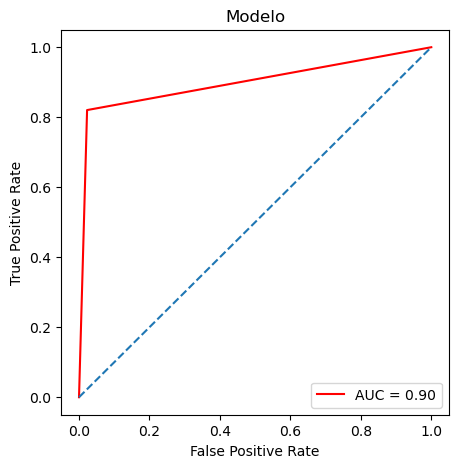

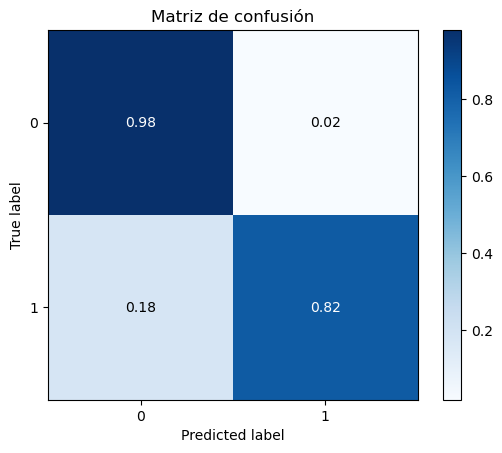

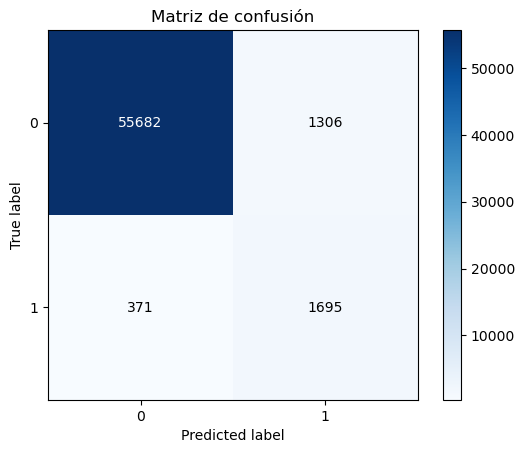

In [37]:
del mejoresParametrosCB['auc']
modeloCB=CatBoostClassifier(**mejoresParametrosCB)#Los mejores parámetros obtenidos
modeloCB.fit(X_train2,y_train2)
validarModeloTest(X_test,y_test,modeloCB)

In [38]:
joblib.dump(modeloCB, 'modeloCatboost.pkl') # Guardo el modelo.

['modeloCatboost.pkl']

Matriz de confusión:
[[55167  1821]
 [  388  1678]]
MÉTRICAS -->
 AUC: 0.890 ACC: 0.963  PREC: 0.963  RECALL: 0.963  F1: 0.963


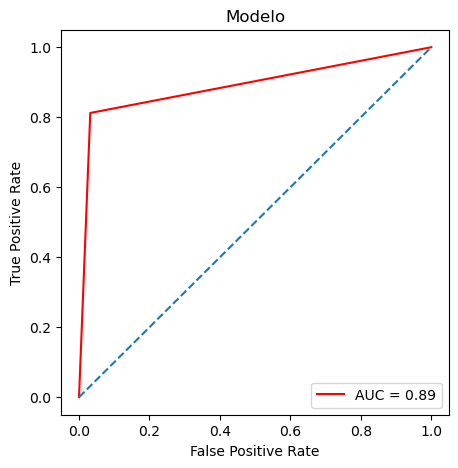

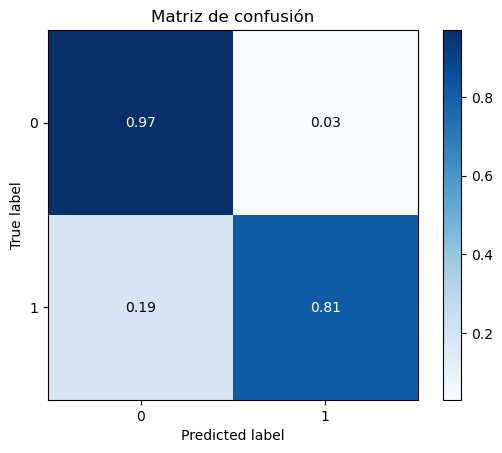

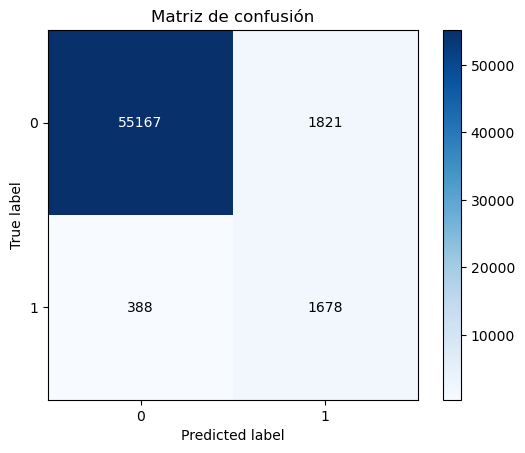

In [40]:
del mejoresParametrosXG['auc']
modelGB=XGBClassifier(**mejoresParametrosXG)
modelGB.fit(X_train2,y_train2)
validarModeloTest(X_test,y_test,modelGB)

In [41]:
joblib.dump(modelGB, 'modeloXGB.pkl') # Guardo el modelo.

['modeloXGB.pkl']